In [41]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')
import seaborn as sns

%matplotlib inline

C:\Users\Dell\Miniconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Dell\Miniconda3\envs\tensorflow-gpu\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Dell\Miniconda3\envs\tensorflow-gpu\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Dell\Miniconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Dell\Miniconda3\envs\tensorflow-gpu\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Dell\Miniconda3\envs\tensor

In [3]:
train = pd.read_csv('train_V2.csv')
train.shape

(4446966, 29)

In [10]:
train.dropna(inplace = True)
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [29]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

train = reduce_mem_usage(train)

Memory usage of dataframe is 1017.83 MB
Memory usage after optimization is: 322.31 MB
Decreased by 68.3%


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int8
boosts             int8
damageDealt        float16
DBNOs              int8
headshotKills      int8
heals              int8
killPlace          int8
killPoints         int16
kills              int8
killStreaks        int8
longestKill        float16
matchDuration      int16
matchType          object
maxPlace           int8
numGroups          int8
rankPoints         int16
revives            int8
rideDistance       float16
roadKills          int8
swimDistance       float16
teamKills          int8
vehicleDestroys    int8
walkDistance       float16
weaponsAcquired    int16
winPoints          int16
winPlacePerc       float16
dtypes: float16(6), int16(5), int8(14), object(4)
memory usage: 322.3+ MB


In [31]:
colors = {
    'red': '#FF1744',
    'pink': '#F50057',
    'purple': '#D500F9',
    'violet': '#651FFF',
    'indigo': '#3D5AFE',
    'blue': '#2979FF',
    'lightblue': '#00B0FF',
    'cyan': '#00E5FF',
    'teal': '#1DE9B6',
    'green': '#00E676',
    'lightgreen': '#76FF03',
    'lime': '#C6FF00',
    'yellow': '#FFEA00',
    'amber': '#FFC400',
    'orange': '#FF9100',
    'brown': '#4E342E',
    'grey': '#424242'
}

C:\Users\Dell\Miniconda3\envs\tensorflow-gpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


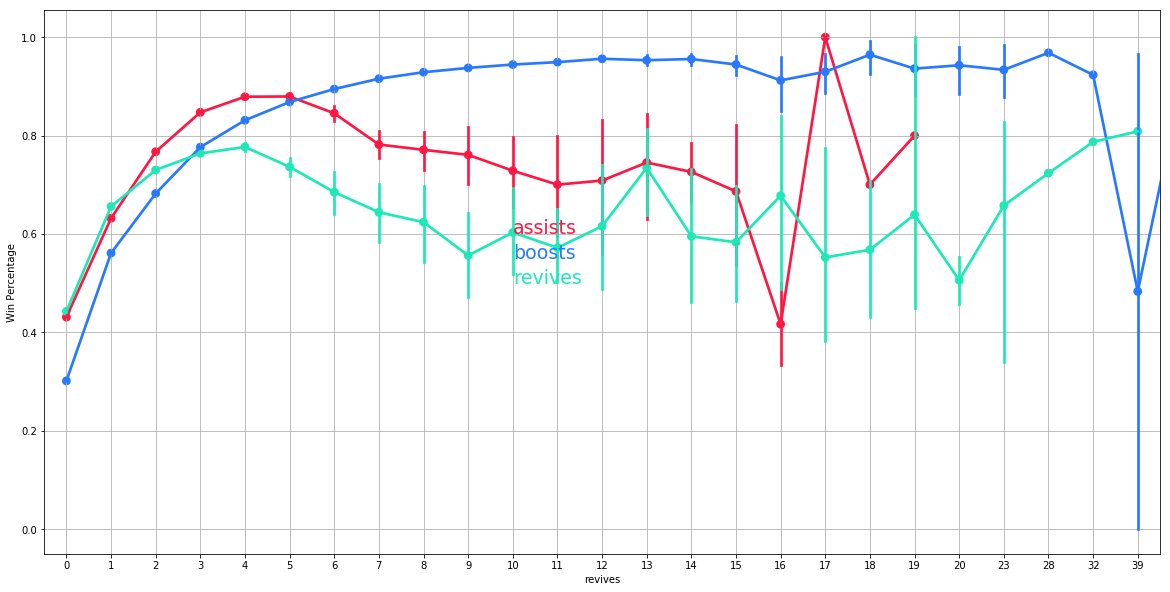

In [43]:
f,ax1 = plt.subplots(figsize = (20, 10))

sns.pointplot(x = 'assists', y = 'winPlacePerc', data = train, color = colors['red'])
sns.pointplot(x = 'boosts', y = 'winPlacePerc', data = train, color = colors['blue'])
sns.pointplot(x = 'revives', y = 'winPlacePerc', data = train, color = colors['teal'])

plt.text(10, 0.6, 'assists', color= colors['red'], fontsize = 19)
plt.text(10, 0.55, 'boosts', color= colors['blue'], fontsize = 19)
plt.text(10, 0.5, 'revives', color= colors['teal'], fontsize = 19)

plt.ylabel('Win Percentage')
plt.grid()
plt.show()

In [ ]:
f,ax1 = plt.subplots(figsize = (20, 10))

sns.pointplot(x = 'damageDealt', y = 'winPlacePerc', data = train, color = colors['purple'])

plt.text(10, 0.4, 'damageDealt', color= colors['purple'], fontsize = 19)

plt.ylabel('Win Percentage')
plt.grid()
plt.show()

C:\Users\Dell\Miniconda3\envs\tensorflow-gpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [ ]:
f,ax1 = plt.subplots(figsize = (20, 10))

sns.pointplot(x = 'longestKill', y = 'winPlacePerc', data = train, color = colors['green'])

plt.text(10, 0.4, 'damageDealt', color= colors['green'], fontsize = 19)

plt.ylabel('Win Percentage')
plt.grid()
plt.show()